In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [6]:
log = pd.read_csv('log.csv', header = None)

In [7]:
log.columns = ['user_id', 'time', 'bet', 'win']

In [4]:
def correct_id(id):
    if id == '#error': return ''
    else: return id.replace('Запись пользователя № - ', '')

In [5]:
log.user_id = log.user_id.apply(correct_id)

In [5]:
log.time = log.time.str.replace('[', '')

In [7]:
log

,user_id,time,bet,win
0,user_919,2019-01-01 14:06:51,NaN,NaN
1,user_973,2019-01-01 14:51:16,NaN,NaN
2,user_903,2019-01-01 16:31:16,NaN,NaN
3,user_954,2019-01-01 17:17:51,NaN,NaN
4,user_954,2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
995,user_984,2019-04-20 9:59:58,9754.0,NaN
996,,NaN,10054.0,29265.0
997,,NaN,10454.0,NaN
998,,NaN,1000.0,NaN


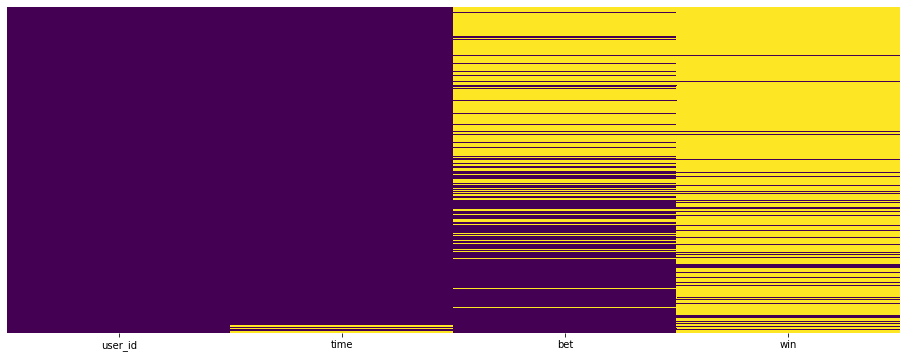

In [8]:
plt.figure(figsize=(16, 6))
sns.heatmap(log.isna(), cbar=False, yticklabels=False, cmap = 'viridis')

In [11]:
log.time.isna().sum()

15

## Делаем backup

In [4]:
lob_backup = log

## Это упражнения. Потом нужно пропустить

In [28]:
log = pd.read_csv('log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.head()

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN


In [15]:
#Удалим столбцы с пропусками
log_c = log.dropna(axis=1)
log_c

,user_id
0,Запись пользователя № - user_919
1,Запись пользователя № - user_973
2,Запись пользователя № - user_903
3,Запись пользователя № - user_954
4,Запись пользователя № - user_954
...,...
995,Запись пользователя № - user_984
996,#error
997,#error
998,#error


In [16]:
#Удалим строки с пропусками
log_s = log.dropna(axis=0)
len(log_s)

133

In [26]:
#Если есть пропуски в столбце user_id - удалите столбец user_id,
#если есть пропуски в столбце time - удалите столбец time.

if log.time.isna().sum() > 0:
    log_ = log.drop(['time'], axis = 1)
if log.user_id.isna().sum() > 0:
    log_ = log_.drop(['user_id'], axis = 1)

In [27]:
log_

,user_id,bet,win
0,Запись пользователя № - user_919,NaN,NaN
1,Запись пользователя № - user_973,NaN,NaN
2,Запись пользователя № - user_903,NaN,NaN
3,Запись пользователя № - user_954,NaN,NaN
4,Запись пользователя № - user_954,NaN,NaN
...,...,...,...
995,Запись пользователя № - user_984,9754.0,NaN
996,#error,10054.0,29265.0
997,#error,10454.0,NaN
998,#error,1000.0,NaN


In [31]:
#Удаляем дубли
log_ = log.drop_duplicates(subset=['user_id', 'time']) 
len(log_)

986

## Конец упражнений

In [33]:
log = lob_backup
log

,user_id,time,bet,win
0,user_919,2019-01-01 14:06:51,NaN,NaN
1,user_973,2019-01-01 14:51:16,NaN,NaN
2,user_903,2019-01-01 16:31:16,NaN,NaN
3,user_954,2019-01-01 17:17:51,NaN,NaN
4,user_954,2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
995,user_984,2019-04-20 9:59:58,9754.0,NaN
996,,NaN,10054.0,29265.0
997,,NaN,10454.0,NaN
998,,NaN,1000.0,NaN


In [7]:
print(log.time.dtype)
log.time = pd.to_datetime(log.time)
print(log.time.dtype)

object
datetime64[ns]


In [38]:
log.time.max()

Timestamp('2019-04-20 18:10:07')

In [45]:
log.time.max().strftime('%Y-%m-%d')

'2019-04-20'

In [39]:
log.time.isna().sum()

15

In [40]:
len(log)

1000

In [41]:
log = log.dropna(axis=0, subset=['time'])
len(log)

985

In [8]:
log = pd.read_csv("log.csv")  
log = log.dropna()  
log.columns = ['user_id', 'time', 'bet', 'win']  
log['time'] = log['time'].apply(lambda x: x[1:])  
log['time'] = pd.to_datetime(log['time'])  
# Пропущенная строка  
log['time'].head() 

13    2019-01-02 08:57:36
28    2019-01-04 13:59:42
150   2019-01-16 21:54:22
188   2019-01-21 18:34:44
204   2019-01-22 05:26:59
Name: time, dtype: datetime64[ns]

In [9]:
log['time'].dt.minute.value_counts()

36.0    25
31.0    23
6.0     22
50.0    22
14.0    21
29.0    21
12.0    21
5.0     21
40.0    21
18.0    21
43.0    21
53.0    21
58.0    20
57.0    20
45.0    20
48.0    20
2.0     20
21.0    19
56.0    19
27.0    19
9.0     18
54.0    18
47.0    18
20.0    18
34.0    18
35.0    18
3.0     18
33.0    18
51.0    17
10.0    17
55.0    16
25.0    16
17.0    16
49.0    15
28.0    15
24.0    15
30.0    15
38.0    15
15.0    15
37.0    15
16.0    15
7.0     14
4.0     14
44.0    14
19.0    14
32.0    14
59.0    13
41.0    13
1.0     13
0.0     12
23.0    12
39.0    12
22.0    11
13.0    11
42.0    11
52.0    10
46.0    10
8.0      9
26.0     9
11.0     6
Name: time, dtype: int64

In [10]:
log['time'].dt.month.value_counts()

1.0    292
3.0    264
2.0    259
4.0    170
Name: time, dtype: int64

In [13]:
((log['time'].dt.dayofweek == 5) | (log['time'].dt.dayofweek == 6)).sum()

283

In [14]:
log = log.dropna(axis=0, subset=['time'])
len(log)

985

In [41]:
#log['time'].apply(lambda x: 'ночь' if 2018 <= x.year <= 2019 else 'день')  
#log['time'].apply(lambda x: 'ночь' if 0 <= x.hour <= 5 else 'вечер')  
log['time'].apply(lambda x: 'ночь' if 0<=x.hour<=5 else 'утро' if 6<=x.hour<=11 else 'день' if 12<=x.hour<=17 else 'вечер') \
           .value_counts()

ночь     265
утро     253
день     240
вечер    227
Name: time, dtype: int64

In [ ]:
log['time'].apply(lambda x: 'ночь' if 0<=x.hour<=5 else 'уторо' if 6<=x.hour<=11)

In [16]:
4<=7<=8

True

In [46]:
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.dropna(inplace=True)
log.time = log.time.apply(lambda x: x[1:])
log.time = pd.to_datetime(log.time)
log['hour'] = log.time.dt.hour
log

,user_id,time,bet,win,hour
14,Запись пользователя № - user_917,2019-01-02 08:57:36,145732.0,1987653.0,8
29,Запись пользователя № - user_942,2019-01-04 13:59:42,1678321.0,9876543.0,13
151,Запись пользователя № - user_982,2019-01-16 21:54:22,100.0,4749.0,21
189,Запись пользователя № - user_964,2019-01-21 18:34:44,200.0,4667.0,18
205,Запись пользователя № - user_931,2019-01-22 05:26:59,300.0,4319.0,5
...,...,...,...,...,...
967,Запись пользователя № - user_975,2019-04-19 22:25:15,1000.0,6108.0,22
971,Запись пользователя № - user_912,2019-04-20 10:35:49,10554.0,31799.0,10
972,Запись пользователя № - user_926,2019-04-20 10:35:50,10354.0,30244.0,10
976,Запись пользователя № - user_970,2019-04-20 10:35:54,10354.0,30691.0,10


In [53]:
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'].fillna(0, inplace = True)
log['bet'].value_counts()
#log['bet'].sort_values()

0.0          515
500.0         50
100.0         48
300.0         42
800.0         42
200.0         40
400.0         40
700.0         38
600.0         37
1000.0        37
900.0         30
9754.0        10
10554.0       10
10154.0        7
10254.0        7
10454.0        6
9954.0         6
10754.0        5
10654.0        5
10354.0        4
10054.0        4
9854.0         2
5000.0         1
27000.0        1
9876.0         1
156789.0       1
12945.0        1
12548.0        1
145732.0       1
1678321.0      1
98753.0        1
123981.0       1
104540.0       1
8700.0         1
950.0          1
8734.0         1
7650.0         1
Name: bet, dtype: int64

In [64]:
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'].fillna(0, inplace = True)

In [65]:
def fillna_win(row):  
    #if ~pd.isnull(row.win):
    if ~np.isnan(row.win):    
        return row.win
    else:
        return -row.bet
    
  
#Применяем функцию  
new_win = log.apply(lambda row: fillna_win(row), axis=1)  


# Заменяем старый столбец с пропусками на новый без пропусков  
log['win'] = new_win  
log

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,0.0,-0.0
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,0.0,-0.0
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,0.0,-0.0
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,0.0,-0.0
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,0.0,-0.0
...,...,...,...,...
995,Запись пользователя № - user_984,[2019-04-20 9:59:58,9754.0,-9754.0
996,#error,NaN,10054.0,29265.0
997,#error,NaN,10454.0,-10454.0
998,#error,NaN,1000.0,-1000.0


In [66]:
log[log.win < 0]

,user_id,time,bet,win
5,Запись пользователя № - user_917,[2019-01-01 23:34:55,156789.0,-156789.0
19,Запись пользователя № - user_942,[2019-01-03 14:03:21,98753.0,-98753.0
67,Запись пользователя № - user_987,[2019-01-07 21:46:13,5000.0,-5000.0
81,Запись пользователя № - user_910,[2019-01-08 21:14:57,123981.0,-123981.0
92,Запись пользователя № - user_964,[2019-01-09 3:05:33,100.0,-100.0
...,...,...,...,...
994,Запись пользователя № - user_977,[2019-04-20 18:10:07,10354.0,-10354.0
995,Запись пользователя № - user_984,[2019-04-20 9:59:58,9754.0,-9754.0
997,#error,NaN,10454.0,-10454.0
998,#error,NaN,1000.0,-1000.0


In [67]:
log['net'] = log['win'] - log['bet']

In [68]:
log[log.net > 0]

,user_id,time,bet,win,net
14,Запись пользователя № - user_917,[2019-01-02 8:57:36,145732.0,1987653.0,1841921.0
29,Запись пользователя № - user_942,[2019-01-04 13:59:42,1678321.0,9876543.0,8198222.0
151,Запись пользователя № - user_982,[2019-01-16 21:54:22,100.0,4749.0,4649.0
189,Запись пользователя № - user_964,[2019-01-21 18:34:44,200.0,4667.0,4467.0
205,Запись пользователя № - user_931,[2019-01-22 5:26:59,300.0,4319.0,4019.0
...,...,...,...,...,...
981,#error,NaN,800.0,7035.0,6235.0
986,#error,NaN,10454.0,29972.0,19518.0
987,#error,NaN,10554.0,31634.0,21080.0
991,Запись пользователя № - user_965,[2019-04-20 12:55:41,800.0,6927.0,6127.0


In [70]:
log[log.net > 0].net.mean()

80253.33333333333

In [71]:
log[log.net > 0].net.median()

5347.0

In [72]:
log.bet.mean()

3291.083

In [73]:
log_bak = log

In [74]:
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']

In [75]:
log.bet.mean()

6785.738144329897

In [78]:
log.bet.mean(skipna=False)

nan

In [77]:
log.bet.mean(skipna=True)

6785.738144329897

In [79]:
pd.mean(log['bet'])

AttributeError: module 'pandas' has no attribute 'mean'

In [80]:
log.bet.sum() / log.bet.dropna().shape[0]

6785.738144329897

In [81]:
np.mean(log.bet)

6785.738144329897

In [82]:
log['bet'].dropna().mean()

6785.738144329897

In [17]:
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'].fillna(0, inplace = True)
log['win'].fillna(0, inplace = True)
log['net'] = log['win'] - log['bet']

In [7]:
len(log[log['bet'] > 0]) / len(log)

0.485

In [8]:
print(len(log[log['bet'] > 0]), len(log))

485 1000


In [18]:
print(len(log[log['bet'] > 0]), len(log))

485 1000


In [11]:
log[log['bet'] > 0].bet.mean()

6785.738144329897

In [24]:
len(log[(log['bet'] > 0) & (log['net'] > 0)]) / len(log[(log['bet'] > 0)])

0.2845360824742268

In [25]:
len(log[(log['bet'] > 0) & (log['net'] < 0)]) / len(log[(log['bet'] > 0)])

0.7154639175257732

In [26]:
len(log[(log['bet'] > 0) & (log['net'] == 0)]) / len(log[(log['bet'] > 0)])

0.0

In [30]:
min_bet = log[log['bet'] > 0].bet.min()

In [31]:
min_bet_amount = len(log[log['bet'] == min_bet])
min_bet_amount

48

In [2]:
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'].fillna(0, inplace = True)
log['win'].fillna(0, inplace = True)
log.time = log.time.str.replace('[', '')
#log['time'] = log['time'].apply(lambda x: x[1:])  
log['time'] = pd.to_datetime(log['time'])  
log['net'] = log['win'] - log['bet']
us = pd.read_csv('users.csv', encoding = 'koi8_r', sep = '\t')
us.columns = ['user_id', 'email', 'geo']
#Остались дубли, пропуски в time, строковое и с [ time; и пропуски в us

In [3]:
# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  

In [4]:
df = pd.merge(log, us, on='user_id')
df

,user_id,time,bet,win,net,email,geo
0,user_919,2019-01-01 14:06:51,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
1,user_919,2019-01-30 10:06:00,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
2,user_919,2019-02-05 14:33:44,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
3,user_919,2019-02-14 11:38:05,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
4,user_919,2019-03-02 04:23:36,300.0,0.0,-300.0,Chikkaverle@icloud.com,Хабаровск
...,...,...,...,...,...,...,...
970,user_932,2019-02-24 22:40:06,0.0,0.0,0.0,BraceWalker@bk.ru,Красноярск
971,user_932,2019-03-15 10:56:14,0.0,0.0,0.0,BraceWalker@bk.ru,Красноярск
972,user_932,2019-03-18 10:13:24,0.0,0.0,0.0,BraceWalker@bk.ru,Красноярск
973,user_932,2019-03-27 12:18:24,0.0,0.0,0.0,BraceWalker@bk.ru,Красноярск


In [80]:
df.groupby('user_id').win.median().median()

0.0

In [81]:
df.groupby('user_id').net.sum().median()

1986.0

In [5]:
list_id_bet_not_null = df[df['bet'] >0 ].groupby('user_id').user_id.count().index
len(list_id_bet_not_null)

100

In [6]:
df0 = df[df['bet'] == 0].groupby('user_id').bet.count().to_frame().reset_index()
df0[df0.user_id.isin(list_id_bet_not_null)]

df0.bet.sum() / len(df0)

5.05

In [7]:
def diffrence(id):
    first_came_t = df[(df['user_id'] == id) & (df['bet'] == 0)].time.min()
    first_bet_t = df[(df['user_id'] == id) & (df['bet'] > 0)].time.min()
    return first_bet_t - first_came_t

In [12]:
type(np.timedelta64(0))

numpy.timedelta64

In [13]:
count_ids = 0
sum_time = np.timedelta64(0)
for id in list_id_bet_not_null:
    count_ids += 1
    sum_time += diffrence(id)
    
sum_time.days / count_ids

46.28

In [14]:
df.groupby('geo').win.sum().sort_values()

geo
Тюмень                 4701.0
Екатеринбург          36682.0
Ставрополь            46003.0
Краснодар             62718.0
Хабаровск             65459.0
Пермь                 67734.0
Арзангелтск           74375.0
Красноярск            84767.0
Ижевск                84895.0
Ярославль             97441.0
Казань                97806.0
Санкт-Петербург      151007.0
Воронеж              184338.0
Москва             11959741.0
Name: win, dtype: float64

In [24]:
(df[df['bet']>0].groupby('geo').bet.max() / df[df['bet']>0].groupby('geo').bet.min())#.mean()
Min=df[df.bet > 0].groupby('geo').bet.mean().min()
Max=df[df.bet > 0].groupby('geo').bet.mean().max()
Max/Min

127.81602335164835

In [25]:
(df[df['bet']>0].groupby('geo').bet.max() / df[df['bet']>0].groupby('geo').bet.min()).mean()

1283.4392857142861